# Coin toss

If a coin has a probability of $p$ for showing heads and $q=1-p$ for showing heads, then the probability of seeing $M$ heads when coin is tossed $n>M$ times is given by: 
$$ P(M;n) = \frac{n!}{M!(n-M)!} p^M q^{n-M} $$


If the average the number of heads is denoted $M_n\equiv M/n$, then clearly $0\le M_n \le 1$ and we expect that $M_{n\rightarrow \infty} = p$. For $M_n$ being in the range $(x,y)$, we have: 
$$ Prob(x<M_n<y) = \sum_{r \in \mathcal Z~\wedge~x<\frac{r}{n}<y} P(r;n) $$



## Task-1:  
1. Plot $\log P(M_n=x)$ vs $x$ for various $n$.  Note that $\int_{0}^{1} dx~P(M_n=x) = 1$.
2. Show that $P(M_n=x)$ near $x=\frac{1}{2}$ is Gaussian.

In [2]:
import scipy.misc

In [3]:
import scipy.special
import matplotlib

In [4]:
#scipy.special.binom(7,5)

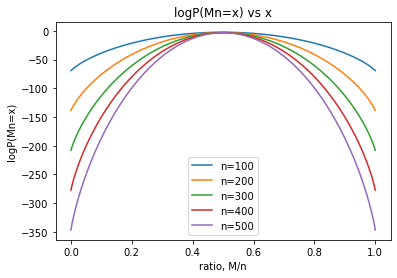

In [5]:
    import numpy as np
    n=100
    p=0.5 
    q=0.5
    while(n<600):
        num_heads=[i for i in range(n+1)]
        prob_0=[scipy.special.binom(n,i)*np.power(p,i)*np.power(q,(n-i)) for i in num_heads ]
        prob=[np.log(i) for i in prob_0]
        x=[i/n for i in num_heads]
        from matplotlib.pyplot import plot
        plot(x,prob,label="n=%d"%n)
        n+=100
   
matplotlib.pyplot.xlabel('ratio, M/n')
matplotlib.pyplot.ylabel('logP(Mn=x)')
matplotlib.pyplot.title('logP(Mn=x) vs x')
matplotlib.pyplot.legend()

In [6]:
def gaussian(x,x0,sigma,c):
    return c*np.exp((-(x-x0)**2)/(2*sigma**2))
#def gaussian(x,x0,sigma,c):
    #return c*np.exp(-np.power((x-x0),2)/(2*np.power(sigma,2)))                


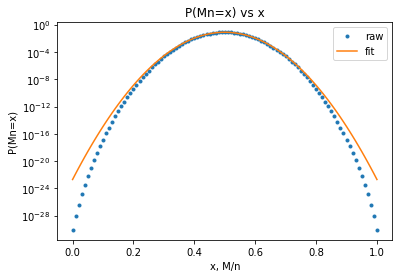

In [7]:
import numpy as np
import statistics
n=100
num_heads=[i for i in range(n+1)]
prob=[scipy.special.binom(n,i)*np.power(p,i)*np.power(q,(n-i)) for i in num_heads]
x=[i/n for i in num_heads]
from matplotlib.pyplot import plot
#plot(x,prob,label="n=100")

import scipy.optimize
xdata=[M/n for M in range(n+1)]
popt, pcov = scipy.optimize.curve_fit(gaussian,np.array(xdata),np.array(prob))

matplotlib.pyplot.semilogy(x,prob,'.',label='raw')
matplotlib.pyplot.plot(xdata,gaussian(xdata,*popt),label='fit')

matplotlib.pyplot.xlabel('x, M/n')
matplotlib.pyplot.ylabel('P(Mn=x)')
matplotlib.pyplot.title('P(Mn=x) vs x')
matplotlib.pyplot.legend()

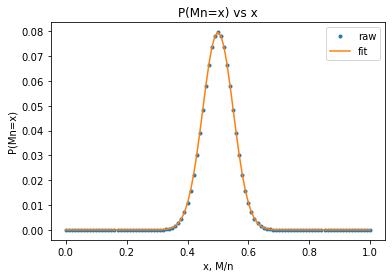

In [8]:
matplotlib.pyplot.plot(x,prob,'.',label='raw')
matplotlib.pyplot.plot(xdata,gaussian(xdata,*popt),label='fit')

matplotlib.pyplot.xlabel('x, M/n')
matplotlib.pyplot.ylabel('P(Mn=x)')
matplotlib.pyplot.title('P(Mn=x) vs x')
matplotlib.pyplot.legend()

## Task-2:  Assume a fair coin from now on i.e. $p=q=\frac{1}{2}$

Plot $\log P(M_n > x)$ as a function of $n\in[1,250]$ for $x=0.6,~0.7,~0.8,~0.9$

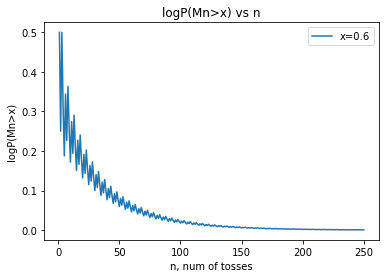

In [30]:
x=0.6
val_n=[i for i in range(1,251,1)]
y=[]
for n in val_n:
    num_heads=[i for i in range(n+1)]
    prob_0=[scipy.special.binom(n,i)/2**n for i in num_heads ]
    prob=0
    for i in num_heads:
        if((i/n)>x):
            prob+=prob_0[i]
    y.append((prob)) 
plot(val_n,y,label="x=0.6")
matplotlib.pyplot.xlabel('n, num of tosses')
matplotlib.pyplot.ylabel('logP(Mn>x)')
matplotlib.pyplot.title('logP(Mn>x) vs n')
matplotlib.pyplot.legend()

In [10]:
I=[]
import numpy

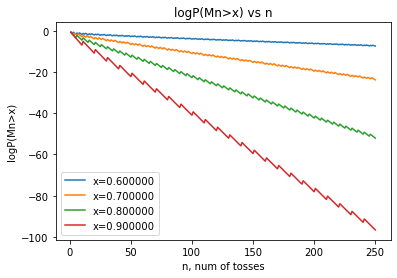

In [11]:
list_x=[0.6,0.7,0.8,0.9]
for x in list_x:
    val_n=[i for i in range(1,251,1)]
    y=[]
    for n in val_n:
        num_heads=[i for i in range(n+1)]
        prob_0=[scipy.special.binom(n,i)/2**n for i in num_heads ]
        prob=0
        for i in num_heads:
            if((i/n)>x):
                prob+=prob_0[i]
        y.append(np.log(prob))     
    
    from matplotlib.pyplot import plot
    plot(val_n,y,label="x=%lf"%x)
    #a,b=numpy.polyfit(val_n, y, 1)
    #I.append(a)

matplotlib.pyplot.xlabel('n, num of tosses')
matplotlib.pyplot.ylabel('logP(Mn>x)')
matplotlib.pyplot.title('logP(Mn>x) vs n')
matplotlib.pyplot.legend()

In [12]:
I

[]

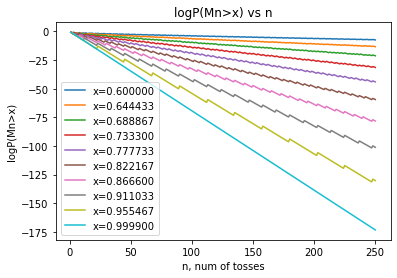

In [13]:
for x in np.linspace(0.6,0.9999,10):
    val_n=[i for i in range(1,251,1)]
    y=[]
    for n in val_n:
        num_heads=[i for i in range(n+1)]
        prob_0=[scipy.special.binom(n,i)/2**n for i in num_heads ]
        prob=0
        for i in num_heads:
            if((i/n)>x):
                prob+=prob_0[i]
        y.append(np.log(prob)) 
    plot(val_n,y,label="x=%lf"%x)
    a,b=numpy.polyfit(val_n, y, 1)
    I.append(a)
    
matplotlib.pyplot.xlabel('n, num of tosses')
matplotlib.pyplot.ylabel('logP(Mn>x)')
matplotlib.pyplot.title('logP(Mn>x) vs n')
matplotlib.pyplot.legend()


## Task-3: 
Note that for large $N$, the above plots are linear. 
Fit the above plots (of $\log Prob(M_n >x)$ vs $n$) to straight lines for large $n$ and get the slope, which we will call $I(x)$. Now plot $I(x)$ vs $x$.

Text(0.5, 1.0, 'I(x) vs x')

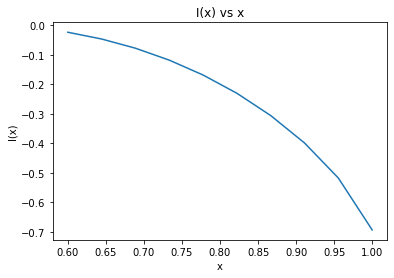

In [14]:
plot(np.linspace(0.6,0.9999,10),I)
matplotlib.pyplot.xlabel('x')
matplotlib.pyplot.ylabel('I(x)')
matplotlib.pyplot.title('I(x) vs x')

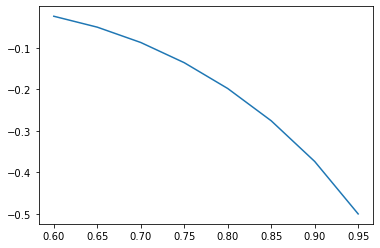

In [15]:
#polyfit
I=[]
import numpy
possible_x=[0.6]
while possible_x[-1]<(1-0.05):
    possible_x.append(possible_x[-1]+0.05)

for x in possible_x:
    val_n=[i for i in range(1,251,1)]
    y=[]
    for n in val_n:
        num_heads=[i for i in range(n+1)]
        prob_0=[scipy.special.binom(n,i)/2**n for i in num_heads ]
        prob=0
        for i in num_heads:
            if((i/n)>x):
                prob+=prob_0[i]
        y.append(np.log(prob))     
    
    a,b=numpy.polyfit(val_n, y, 1)
    I.append(a)
plot(possible_x,I)

## Task-4:  Random walk
Let $c(t)$ be the result of coin toss, tossed at time $t$. Then Random Walk is given by 
$$ x(t+1) = x(t) + \delta_{c(t),H} - \delta_{c(t),T}
$$ 
with $x(0)=0$ and $c(t)$ is the coin toss at time $t$, with two possible outcomes heads ($H$) or tails ($T$).

Plot a one realisation of $x(t)$ for $t\in[0,100]$


In [16]:
import random
import matplotlib

Text(0.5, 1.0, 'displacement vs t')

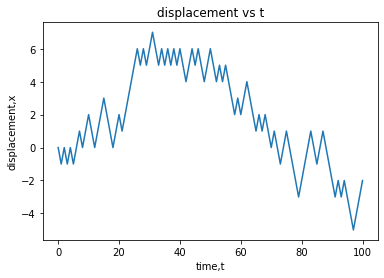

In [17]:
y=[0]
for t in range (1,101):
    if(random.uniform(0,1)<0.5):
        y.append(y[-1]+1)
    else:
        y.append(y[-1]-1)
from matplotlib.pyplot import plot

plot(y)
matplotlib.pyplot.xlabel('time,t')
matplotlib.pyplot.ylabel('displacement,x')
matplotlib.pyplot.title('displacement vs t')


## Task-5: Moments of distribution of $x(t)$

1. What would be $\langle x(t) \rangle$? 
2. What would be $\langle x^2(t) \rangle$? Why?
3. Compute them by genrating a sample of random walks. Comment on the 'error' of the calculation

Text(0.5, 1.0, 'average as a function of time')

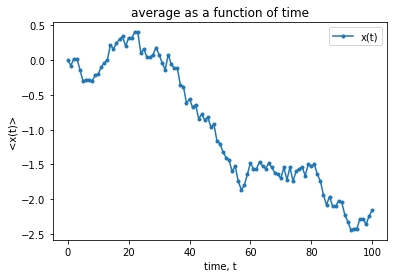

In [18]:
import random
walks=[]
num_of_walks_considered=100
time_interval=100
for i in range(num_of_walks_considered):
    y=[0]
    for t in range (1,time_interval+1):
        if(random.uniform(0,1)<0.5):
            y.append(y[-1]+1)
        else:
            y.append(y[-1]-1)
    walks.append(y)
#walks
collection_of_random_walks=numpy.array(walks)
avg_xt=numpy.sum(collection_of_random_walks,axis=0)/numpy.shape(collection_of_random_walks)[0]
#avg_xt
plot([i for i in range(time_interval+1)],avg_xt,'.-',label='x(t)')
matplotlib.pyplot.xlabel('time, t')
matplotlib.pyplot.ylabel('<x(t)>')
matplotlib.pyplot.legend()
matplotlib.pyplot.title('average as a function of time')

As time tends to infinity,the average displacement tends to 0

Text(0.5, 1.0, 'average of squares as a function of time')

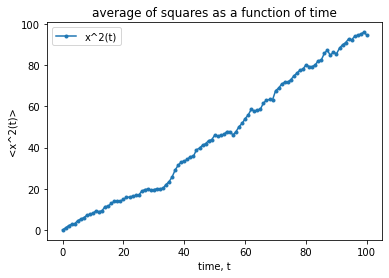

In [19]:
import random
walks=[]
num_of_walks_considered=100
time_interval=100
for i in range(num_of_walks_considered):
    y=[0]
    for t in range (1,time_interval+1):
        if(random.uniform(0,1)<0.5):
            y.append(y[-1]+1)
        else:
            y.append(y[-1]-1)
    y=[i**2 for i in y]
    walks.append(y)
#walks
collection_of_random_walks=numpy.array(walks)
avg_x_2t=numpy.sum(collection_of_random_walks,axis=0)/numpy.shape(collection_of_random_walks)[0]
#avg_xt
plot([i for i in range(time_interval+1)],avg_x_2t,'.-',label='x^2(t)')
matplotlib.pyplot.xlabel('time, t')
matplotlib.pyplot.ylabel('<x^2(t)>')
matplotlib.pyplot.legend()
matplotlib.pyplot.title('average of squares as a function of time')

## Task-6: Random walk with a trap

At $x=M$, random walker is trapped, i.e. imagine that $x=M$ is the location of jail, where once the 'drunk' random walker reaches, is trapped for ever. 

Let $y_M(t)$ is the probabilty that a trapped random walker at time $t$ in a trap located at $x=M$, given that  starting  point is $x=0$ at $t=0$. 

Compute $y_M(t)$ by generating a sample of random walks. Comment.

In [20]:
import matplotlib

Text(0.5, 1.0, 'probability of being trapped as a function of time')

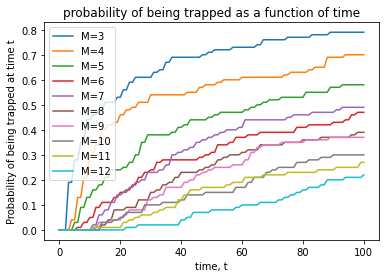

In [21]:
for M in range(3,13):
    num_trapped_at_t=[]
    for i in range(101):
        num_trapped_at_t.append(0)

    for no_of_walks in range(1,101):
        y=[0]
        for t in range (1,101):
            if(y[-1]==M):
                y.append(y[-1])
            else:
                if(random.uniform(0,1)<0.5):
                    y.append(y[-1]+1)
                else:
                    y.append(y[-1]-1)
                
        for t in range(101):
            if(y[t]==M):
                num_trapped_at_t[t]+=1

    prob_of_being_trapped=[i/100 for i in num_trapped_at_t] 

    from matplotlib.pyplot import plot
    plot(prob_of_being_trapped,label="M=%d"%M)
matplotlib.pyplot.legend()
matplotlib.pyplot.xlabel('time, t')
matplotlib.pyplot.ylabel('Probability of being trapped at time t')
matplotlib.pyplot.legend()
matplotlib.pyplot.title('probability of being trapped as a function of time')

## Task-7: What is the relationship between the result in Task-2 for `Coin Toss problem` and the rate of reaching the trap in Task-6 for `Random walk with a trap` problem